# 🍕 Pizza Sales Analysis

The purpose of this project is to performing an **explorative analysis** of a fictional pizza place sales report covering one year. Using the provided datasets, i will answer questions such as;
- Types of pizza sold?
- What sizes of pizza are available?
- How many pizzas are ordered?
- How much revenue was generated?
- What are the key sales trend over time?

The analysis includes **charts and visualisations** that futher butress my analysis.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## importing datasets

In [2]:
orders = pd.read_csv(r"C:\Users\HP\Documents\pizza_sales\orders.csv")


In [3]:
order_details = pd.read_csv(r"C:\Users\HP\Documents\pizza_sales\order_details.csv")

In [4]:
pizzas = pd.read_csv(r"C:\Users\HP\Documents\pizza_sales\pizzas.csv")

In [5]:
pizza_types = pd.read_csv(r"C:\Users\HP\Documents\pizza_sales\pizza_types.csv", encoding='latin1')

## Inspecting the data

In [6]:
orders.info()
orders.describe()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [7]:
order_details.info()
order_details.describe()
order_details.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [8]:
pizzas.info()
pizzas.describe()
pizzas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [9]:
pizza_types.info()
pizza_types.describe()
pizza_types.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## Joining Datasets into a single dataframe

In [10]:
# joining order details with pizzas using pizza id column
df = order_details.merge(pizzas, on='pizza_id')

# joining the new dataframe(df) with pizza types using pizza type id column
df = df.merge(pizza_types, on='pizza_type_id')

# joining df with orders table using order_id column
df = df.merge(orders, on='order_id')

In [11]:
df.head()

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time
0,1,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",2015-01-01,11:57:40
2,3,2,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",2015-01-01,11:57:40
3,4,2,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",2015-01-01,11:57:40
4,5,2,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-01-01,11:57:40


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   pizza_type_id     48620 non-null  object 
 5   size              48620 non-null  object 
 6   price             48620 non-null  float64
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  date              48620 non-null  object 
 11  time              48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


## Converting Dtype of date and time

In [17]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = pd.to_datetime(df['time'])

# creating new columns to let us group by day,month or hour
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()
df['hour'] = df['time'].dt.hour

In [14]:
df.info()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   pizza_type_id     48620 non-null  object        
 5   size              48620 non-null  object        
 6   price             48620 non-null  float64       
 7   name              48620 non-null  object        
 8   category          48620 non-null  object        
 9   ingredients       48620 non-null  object        
 10  date              48620 non-null  datetime64[ns]
 11  time              48620 non-null  datetime64[ns]
 12  day_of_week       48620 non-null  object        
 13  month             48620 non-null  object        
 14  hour              4862

,order_details_id,order_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,date,time,day_of_week,month,hour
48615,48616,21348,ckn_alfredo_m,1,ckn_alfredo,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",2015-12-31,2025-09-26 21:23:10,Thursday,December,21
48616,48617,21348,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",2015-12-31,2025-09-26 21:23:10,Thursday,December,21
48617,48618,21348,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",2015-12-31,2025-09-26 21:23:10,Thursday,December,21
48618,48619,21349,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",2015-12-31,2025-09-26 22:09:54,Thursday,December,22
48619,48620,21350,bbq_ckn_s,1,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",2015-12-31,2025-09-26 23:02:05,Thursday,December,23


## Performing Analysis

1) The Total revenue generated by the store in one year is : $817,860.05
                                                               
2) The Total Quantity sold is: 49,574
                                                                  
3)The Total Orders = 21,350
                                                                 
4) The Total number of pizza types are: 32
                                                                 
5) The Average price of pizza is : $16.49
                                                                 
6) Our daily peak hour is: 12pm
                                                                 
 The Bar Chart Below Shows The Operational Efficiency By Time


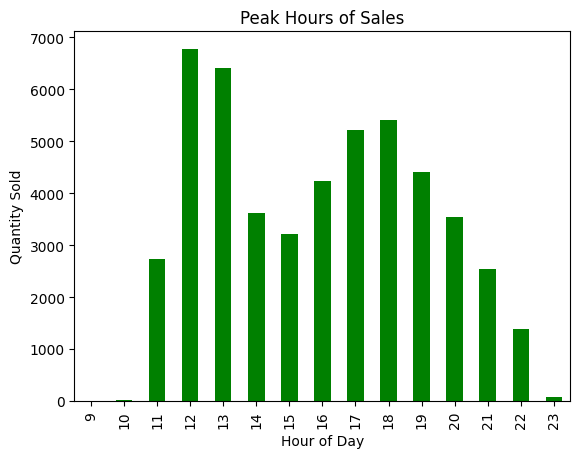

7) Most sales are made on : Friday
                                                                 
The Bar Chart Below Illustrates Sales Daily Performance 


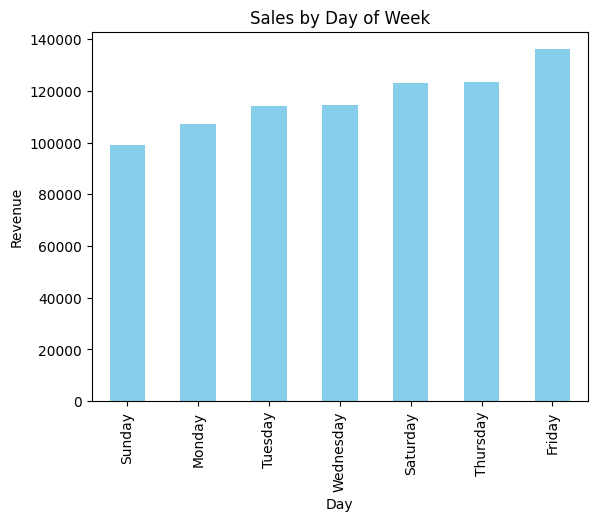

8) Our top 5 best selling pizzas are:
name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64
                                                                 
The Bar Chart Below Illustrates The Top 5 Pizza With The Highests Sales Volume


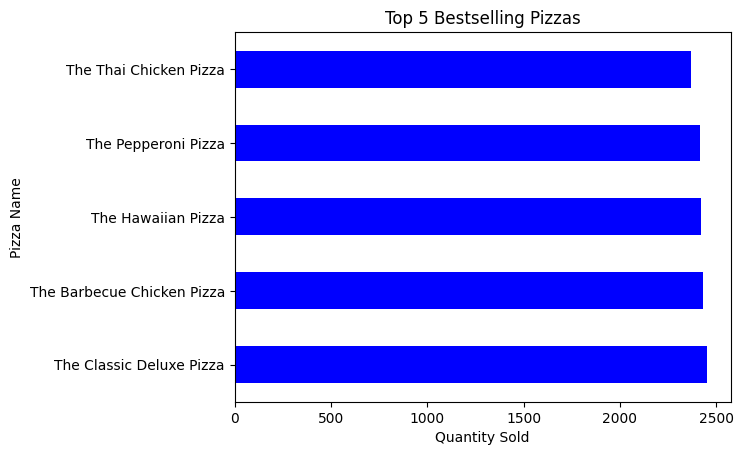

9) The Peak Sales of The Year Occurred in July ($72,557.90)
                                                                   
The Chart Illustrates Monthly Sales Progression And Seasonal Patterns


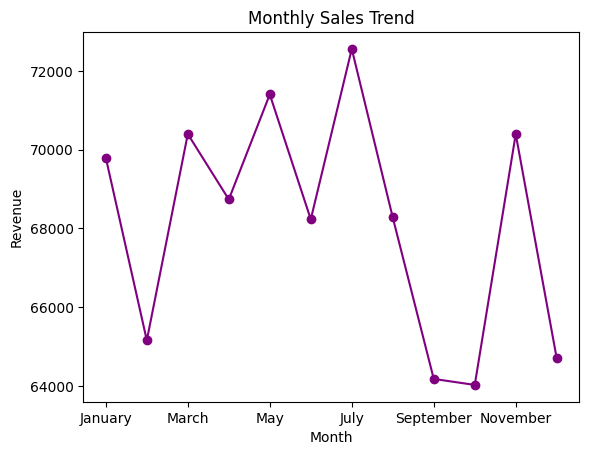

10) Our bottom 5 least selling pizzas are:
name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64
                                                                 
The Bar Chart Below Illustrates The Least 5 Pizza With The Lowest Sales Volume


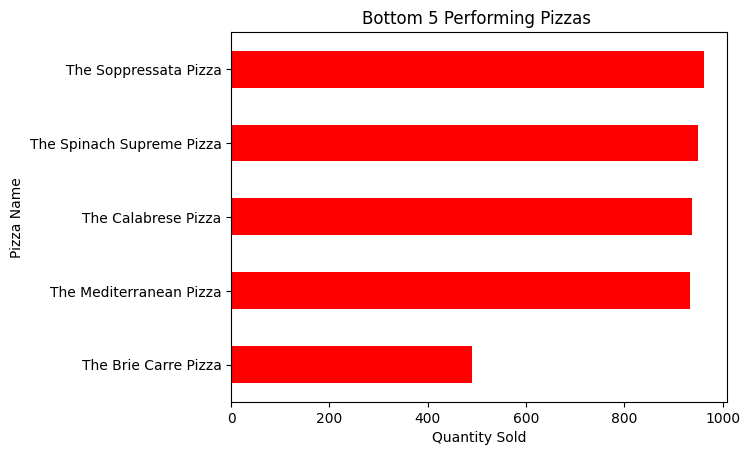

In [15]:
# Total Revenue/Sales
df['revenue'] = df['price'] * df['quantity']
total_revenue = df['revenue'].sum()
print(f'1) The Total revenue generated by the store in one year is : ${total_revenue:,.2f}')
print('                                                               ')


# Total Quantity Sold
total_quantity = df['quantity'].sum()
print(f'2) The Total Quantity sold is: {total_quantity:,}')
print('                                                                  ')


# Total Orders
total_orders = df['order_id'].nunique()
print(f'3)The Total Orders = {total_orders:,}')
print('                                                                 ')


# Number of Pizza Types
pizza_types_count = df['pizza_type_id'].nunique()
print(f'4) The Total number of pizza types are: {pizza_types_count:,}')
print('                                                                 ')


# Average Price of Pizzas
avg_price = df['price'].mean()
print(f'5) The Average price of pizza is : ${avg_price:,.2f}')
print('                                                                 ')


# Peak Hours of Sales
sales_by_hour = df.groupby('hour')['quantity'].sum()
sales_by_hour.plot(kind='bar', color='green')
print(f'6) Our daily peak hour is: {sales_by_hour.idxmax()}pm')
print('                                                                 ')
print(' The Bar Chart Below Shows The Operational Efficiency By Time')
plt.title('Peak Hours of Sales')
plt.xlabel('Hour of Day')
plt.ylabel('Quantity Sold')
plt.show()



# Total Sales by Day of Week
sales_by_day = df.groupby('day_of_week')['revenue'].sum().sort_values()
sales_by_day.plot(kind='bar', color='skyblue')
print(f'7) Most sales are made on : {sales_by_day.idxmax()}')
print('                                                                 ')
print('The Bar Chart Below Illustrates Sales Daily Performance ')
plt.title('Sales by Day of Week')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.show()



# Top 5 Bestselling Pizzas
top_pizzas = (
    df.groupby('name')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print('8) Our top 5 best selling pizzas are:')
print(top_pizzas)
print('                                                                 ')
print('The Bar Chart Below Illustrates The Top 5 Pizza With The Highests Sales Volume')
top_pizzas.plot(kind='barh', color='blue')
plt.title('Top 5 Bestselling Pizzas')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()



# Sales by Month (Trend)
sales_by_month = df.groupby('month')['revenue'].sum()
# Reindex to calendar month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sales_by_month = sales_by_month.reindex(month_order)
peak_month = sales_by_month.idxmax()
peak_revenue = sales_by_month.max()
print(f'9) The Peak Sales of The Year Occurred in {peak_month} (${peak_revenue:,.2f})')
print('                                                                   ')

print('The Chart Illustrates Monthly Sales Progression And Seasonal Patterns')
sales_by_month.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()


# Bottom 5 Poor Performing Pizzas
bottom_pizzas = (
    df.groupby('name')['quantity']
    .sum()
    .sort_values(ascending=True)
    .head(5)
)
print('10) Our bottom 5 least selling pizzas are:')
print(bottom_pizzas)
print('                                                                 ')
print('The Bar Chart Below Illustrates The Least 5 Pizza With The Lowest Sales Volume')
bottom_pizzas.plot(kind='barh', color='red')
plt.title('Bottom 5 Performing Pizzas ')
plt.xlabel('Quantity Sold')
plt.ylabel('Pizza Name')
plt.show()

# Additional Insights Derived From Data

----------(1)----------
                                                                                   
Average Pizzas Sold per Order is : 2.32
A customer orders an average of 2 pizzas on every order placed 
                                                                                   
----------(2)----------
                                                                                   
The median sales per pizza type is: 1452
The number of pizzas doing well on the menu are 16 out of 32 types
The Bar Chart Displays The Strong Selling Items Above The Red Mark While The Least Performing Ones Are Below The Mark


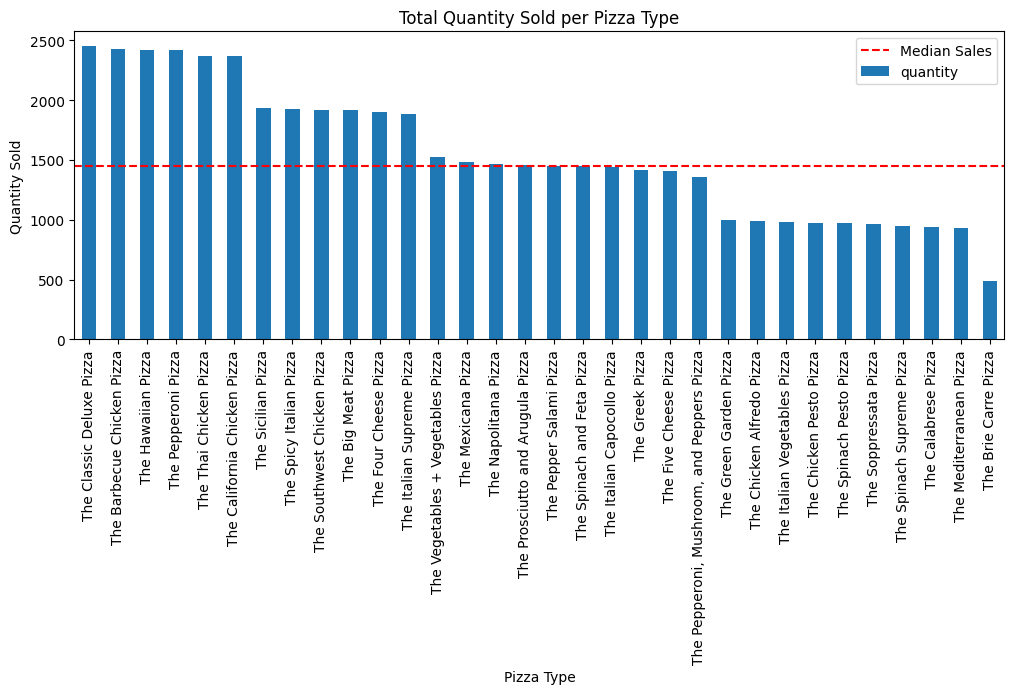

----------(3)----------
                                                                                   
Average Revenue per Pizza Type is : $25,558.13
Pizzas generating above average revenue are 14 out of 32 types
The top 5 high revenue generating pizzas are
name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: revenue, dtype: float64
The Thai Chicken Pizza Generates the Highest Revenue Anually 


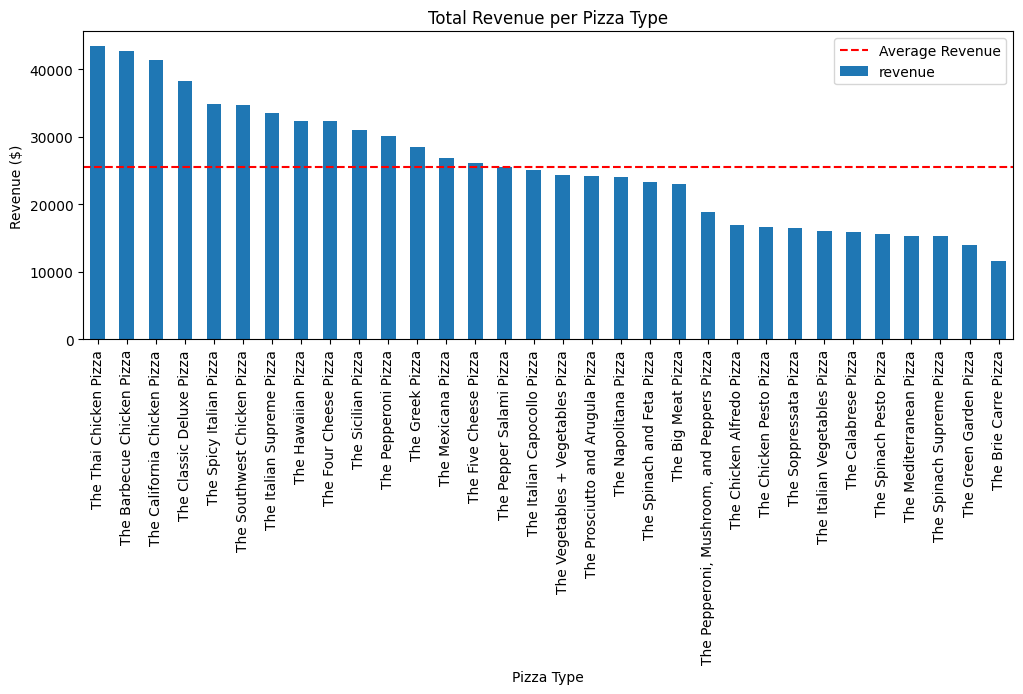

----------(4)----------
                                                                                   
Top 5 Most Expensive Pizzas are:
name
The Greek Pizza                 35.95
The Brie Carre Pizza            23.65
The Italian Vegetables Pizza    21.00
The Barbecue Chicken Pizza      20.75
The Chicken Pesto Pizza         20.75
Name: price, dtype: float64


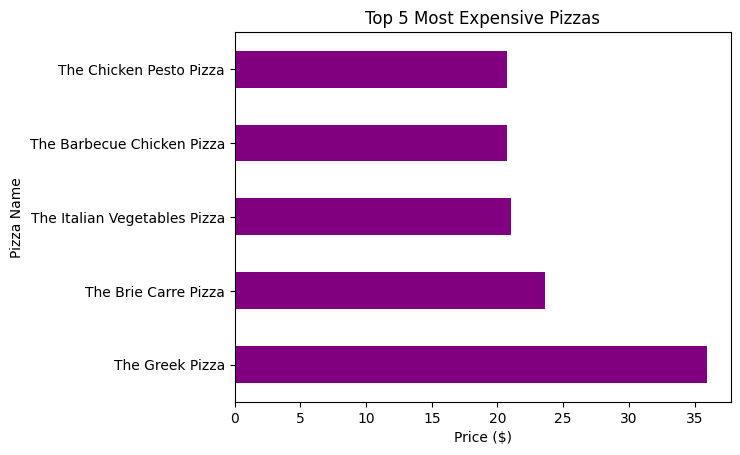

----------(5)----------
The revenue generated by pizza size are:
size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: revenue, dtype: float64


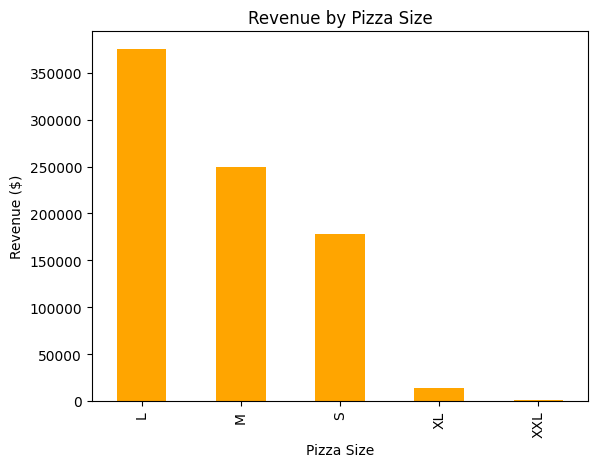

In [32]:
#   (1)
# Average Number of Pizza Ordered by customers Per Order placed
avg_pizza_per_order = total_quantity / total_orders
print('----------(1)----------')
print('                                                                                   ')
print(f'Average Pizzas Sold per Order is : {avg_pizza_per_order:.2f}')
print(f'A customer orders an average of {avg_pizza_per_order:.0f} pizzas on every order placed ')
print('                                                                                   ')


#    (2)
# To determine performance level of all the 32 items on the menu
pizza_sales = (
    df.groupby('name')['quantity']
    .sum()
    .sort_values(ascending=False)
)
median_sales = pizza_sales.median()
print('----------(2)----------')
print('                                                                                   ')
print(f'The median sales per pizza type is: {median_sales:.0f}')

pizza_doing_well = pizza_sales[pizza_sales > median_sales]
print(f'The number of pizzas doing well on the menu are {len(pizza_doing_well)} out of {pizza_sales.count()} types')
print('The Bar Chart Displays The Strong Selling Items Above The Red Mark While The Least Performing Ones Are Below The Mark')

pizza_sales.plot(kind='bar', figsize=(12,4))
plt.axhline(y=median_sales, color='red', linestyle='--', label='Median Sales')
plt.title('Total Quantity Sold per Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Quantity Sold')
plt.legend()
plt.show()


#     (3)
# To Determine Which Pizza Generates the Most Revenue
revenue_per_pizza = (
    df.groupby('name')
    .agg(revenue=('revenue', 'sum'))
    .sort_values('revenue', ascending=False)['revenue']
)
print('----------(3)----------')
print('                                                                                   ')
avg_revenue_per_pizza = revenue_per_pizza.mean()
print(f'Average Revenue per Pizza Type is : ${avg_revenue_per_pizza:,.2f}')

pizzas_above_avg_revenue = revenue_per_pizza[revenue_per_pizza > avg_revenue_per_pizza]
print(f'Pizzas generating above average revenue are {len(pizzas_above_avg_revenue)} out of {len(revenue_per_pizza)} types')
print(f'The top 5 high revenue generating pizzas are')
print(revenue_per_pizza.head())
print('The Thai Chicken Pizza Generates the Highest Revenue Anually ')

revenue_per_pizza.plot(kind='bar', figsize=(12,4))
plt.axhline(y=avg_revenue_per_pizza, color='red', linestyle='--', label='Average Revenue')
plt.title('Total Revenue per Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Revenue ($)')
plt.legend()
plt.show()


#       (4)
# Top 5 most expensive pizzas on the menu
most_expensive_pizzas = (
    df.groupby('name')['price']
    .max()
    .sort_values(ascending=False)
    .head(5)
)
print('----------(4)----------')
print('                                                                                   ')
print('Top 5 Most Expensive Pizzas are:')
print(most_expensive_pizzas)

most_expensive_pizzas.plot(kind='barh', color='purple')
plt.title('Top 5 Most Expensive Pizzas')
plt.xlabel('Price ($)')
plt.ylabel('Pizza Name')
plt.show()


#          (5)
# Revenue by Pizza Size
revenue_by_size = (
    df.groupby('size')['revenue']
    .sum()
    .sort_values(ascending=False)
)
print('----------(5)----------')
print('The revenue generated by pizza size are:')
print(revenue_by_size)

revenue_by_size.plot(kind='bar', color='orange')
plt.title('Revenue by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Revenue ($)')
plt.show()